In [2]:
import numpy as np
#import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pwd

'/Users/birsensirkeci/ML/EE258'

# Fetch MNIST data

In [1]:
from sklearn.datasets import fetch_mldata

mnist_dataset = fetch_mldata('MNIST original')
## if gives error - do the following fix
## http://htrang10108.blogspot.com/2018/08/fetchmldata-how-to-manually-set-up.html


print(type(mnist_dataset), mnist_dataset)


<class 'sklearn.utils.Bunch'> {'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'DESCR': 'mldata.org dataset: mnist-original', 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.]), 'COL_NAMES': ['label', 'data']}


In [7]:
X = mnist_dataset['data']
print('X', type(X), X.shape)

X <class 'numpy.ndarray'> (70000, 784)


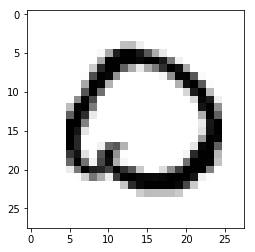

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X[100].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest') #plt.axis("off")
plt.show()

In [10]:
y = mnist_dataset['target']
print('y', type(y), y.shape)
print('split to train', y[:59999])
print('split to test', y[60000:])

y <class 'numpy.ndarray'> (70000,)
split to train [ 0.  0.  0. ...,  9.  9.  9.]
split to test [ 0.  0.  0. ...,  9.  9.  9.]


# Split the train & test data. The mnist is already split to a training set(the first 60,000) and the test set (the last 10,000)

In [11]:
X_train_unshuffled, X_test = X[:60000], X[60000:]
print('X_train_unshuffled', type(X_train_unshuffled), X_train_unshuffled.shape)
print('X_test', type(X_test), X_test.shape)

X_train_unshuffled <class 'numpy.ndarray'> (60000, 784)
X_test <class 'numpy.ndarray'> (10000, 784)


In [12]:
y_train_unshuffled, y_test = y[:60000], y[60000:]
print('y_train_unshuffled', type(y_train_unshuffled), y_train_unshuffled.shape)
print('y_test', type(y_test), y_test.shape)

y_train_unshuffled <class 'numpy.ndarray'> (60000,)
y_test <class 'numpy.ndarray'> (10000,)


# The distribution of TRAINING data

In [13]:
digit_train, counts_train = np.unique(y_train_unshuffled, return_counts = True)

distribution_train = dict(zip(digit_train, counts_train))
print(distribution_train )

{0.0: 5923, 1.0: 6742, 2.0: 5958, 3.0: 6131, 4.0: 5842, 5.0: 5421, 6.0: 5918, 7.0: 6265, 8.0: 5851, 9.0: 5949}


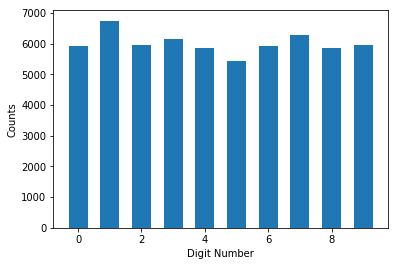

In [14]:
plt.bar(list(distribution_train.keys()),distribution_train.values(),width =0.6)
plt.xlabel('Digit Number')
plt.ylabel('Counts')
plt.show()

# The distribution of TEST data

In [15]:
digit_test, counts_test = np.unique(y_test, return_counts = True)

distribution_test = dict(zip(digit_test, counts_test))
print(distribution_test)

{0.0: 980, 1.0: 1135, 2.0: 1032, 3.0: 1010, 4.0: 982, 5.0: 892, 6.0: 958, 7.0: 1028, 8.0: 974, 9.0: 1009}


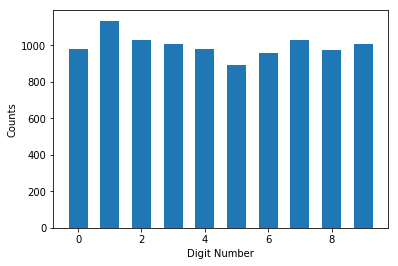

In [16]:
plt.bar(list(distribution_test.keys()),distribution_test.values(),width =0.6)
plt.xlabel('Digit Number')
plt.ylabel('Counts')
plt.show()

# Inspect some examples of the scaled image

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_unshuffled_scaled = scaler.fit_transform(X_train_unshuffled.astype(np.float64))

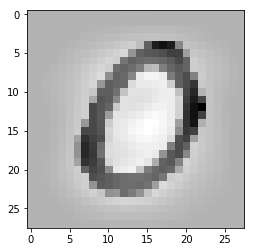

In [22]:
plt.imshow(X_train_unshuffled[300].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest') #plt.axis("off")
plt.imshow(X_train_unshuffled_scaled[300].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest')
plt.show()

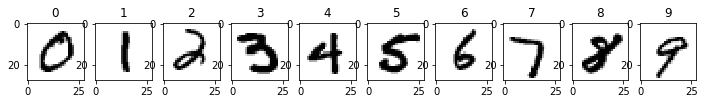

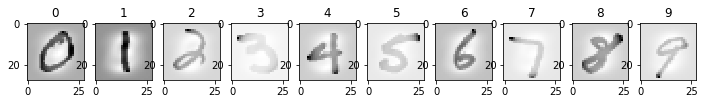

In [23]:
fig_object, ax_object = plt.subplots(1, 10, figsize=(12,5))
ax_object = ax_object.reshape(10,)
      
for i in range(len(ax_object)):
    ax = ax_object[i]
    ax.imshow(X_train_unshuffled[6500*i].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest')
    ax.set_title(i)       
plt.show()

fig_object, ax_object = plt.subplots(1, 10, figsize=(12,5))
ax_object = ax_object.reshape(10,)
      
for i in range(len(ax_object)):
    ax = ax_object[i]
    ax.imshow(X_train_unshuffled_scaled[6500*i].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest')
    ax.set_title(i)       
plt.show()
